# PIMA Indians Diabetes Dataset

The dataset can be found on the Kaggle website. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and can be used to predict whether a patient has diabetes based on certain diagnostic factors.

The analysis intends to create a model on the dataset to predict if a particular observation is at a risk of developing diabetes, given the independent factors.

No of variables = 9

No of observations = 768

preg = Pregnancies (Number of times pregnant)

plas = Glucose, Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = BloodPressure(Diastolic blood pressure (mm Hg))

skin = SkinThickness(Triceps skin fold thickness (mm))

test = Insulin(2-Hour serum insulin (mu U/ml))

mass = BMI(Body mass index (weight in kg/(height in m)^2))

pedi = DiabetesPedigreeFunction

age = in years

class = Outcome variable (0 or 1)

In [1]:
import numpy as np
import pandas as pd

In [2]:
filename = 'pima-indians-diabetes.csv' 
names = [' preg' , ' plas' , ' pres' , ' skin' , ' test' , ' mass' , ' pedi' , ' age' , ' class' ] 
data = pd.read_csv(filename, names=names) 
print(data.shape)

(768, 9)


In [3]:
peek = data.head(20)
peek

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
types = data.dtypes
print(types)

 preg       int64
 plas       int64
 pres       int64
 skin       int64
 test       int64
 mass     float64
 pedi     float64
 age        int64
 class      int64
dtype: object


In [5]:
from pandas import set_option
set_option('display.width', 100) 
set_option('precision', 3)
description = data.describe() 
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


## Class Distribution

In [6]:
class_counts = data.groupby(' class' ).size()
print(class_counts)

 class
0    500
1    268
dtype: int64


## Correlations Between Attributes

In [7]:
set_option('display.width', 100) 
set_option('precision', 3) 
correlations = data.corr(method = 'pearson') 
print(correlations)

         preg   plas   pres   skin   test   mass   pedi    age   class
 preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544   0.222
 plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264   0.467
 pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240   0.065
 skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114   0.075
 test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042   0.131
 mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036   0.293
 pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034   0.174
 age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000   0.238
 class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238   1.000


## Skew of Univariate Distributions 

In [8]:
skew = data.skew() 
print(skew)

 preg     0.902
 plas     0.174
 pres    -1.844
 skin     0.109
 test     2.272
 mass    -0.429
 pedi     1.920
 age      1.130
 class    0.635
dtype: float64


The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

## Univariate Plots

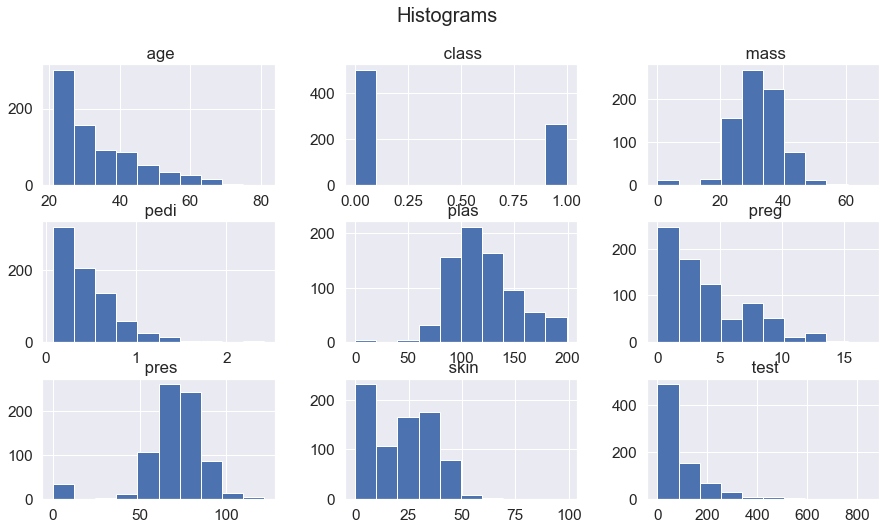

In [30]:
import matplotlib.pyplot as plt
data.hist(figsize = (15,8))
plt.suptitle('Histograms',fontsize=20)
plt.show()

We can see that the attributes age, pedi and test may have an exponential distribution. We can also see that mass, pres and plas attributes may have a Gaussian or near Gaussian distribution.

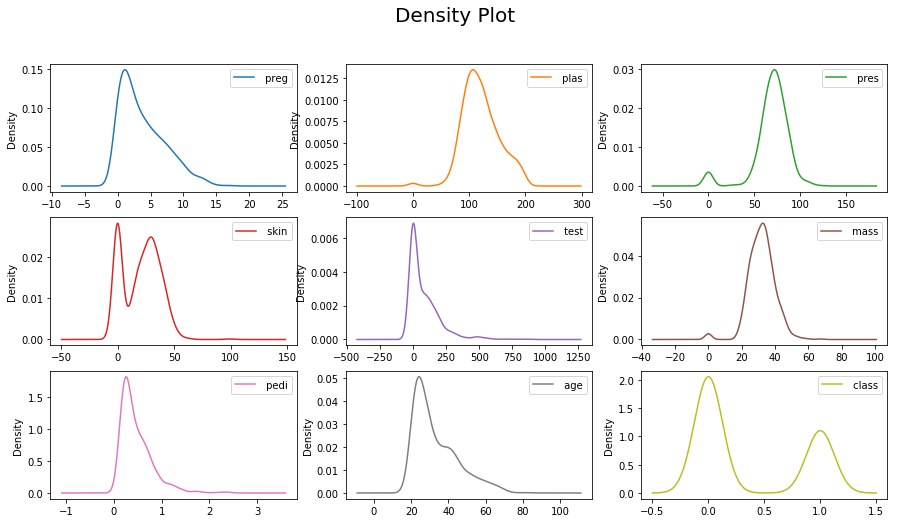

In [10]:
data.plot(kind ='density',figsize = (15,8),subplots=True,layout=(3,3),sharex=False)
plt.suptitle('Density Plot',fontsize=20)
plt.show()

We can see the distribution for each attribute is clearer than the histograms

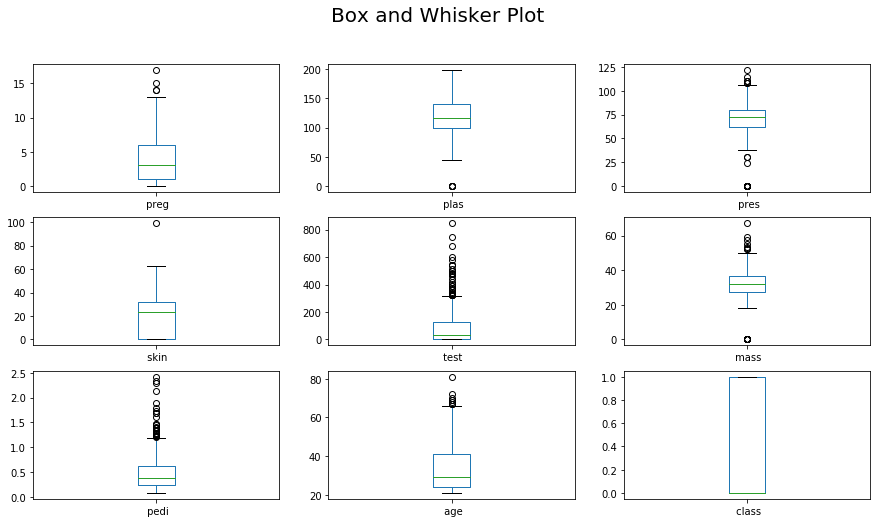

In [11]:
data.plot(kind ='box',figsize = (15,8),subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.suptitle('Box and Whisker Plot',fontsize=20)
plt.show()

We can see that the spread of attributes is quite different. Some like age, test and skin appear quite skewed towards smaller values and the dots outside the whiskers show candidate outlier values.

## Multivariate Plots

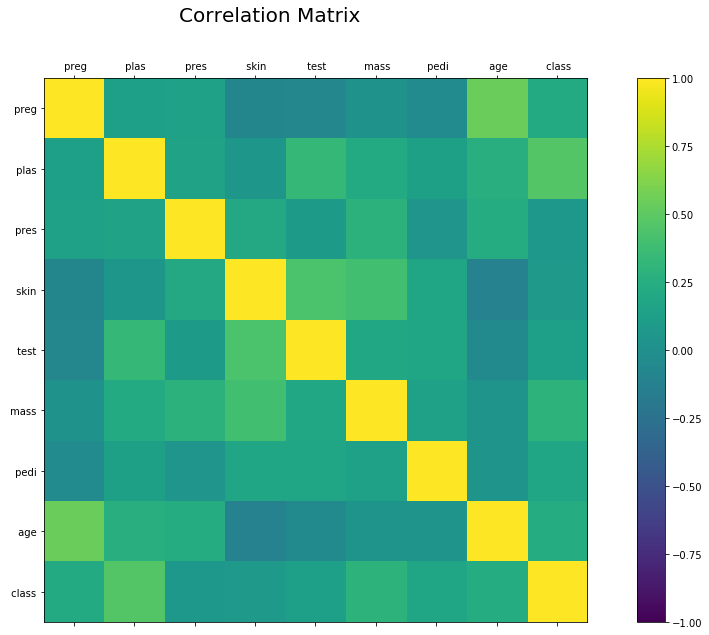

In [12]:
correlations = data.corr()
fig = plt.figure(figsize = (18,10))
plt.suptitle('Correlation Matrix',fontsize=20)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(names)
ax.set_yticklabels(names) 
plt.show()

Each variable is perfectly positively correlated with each other

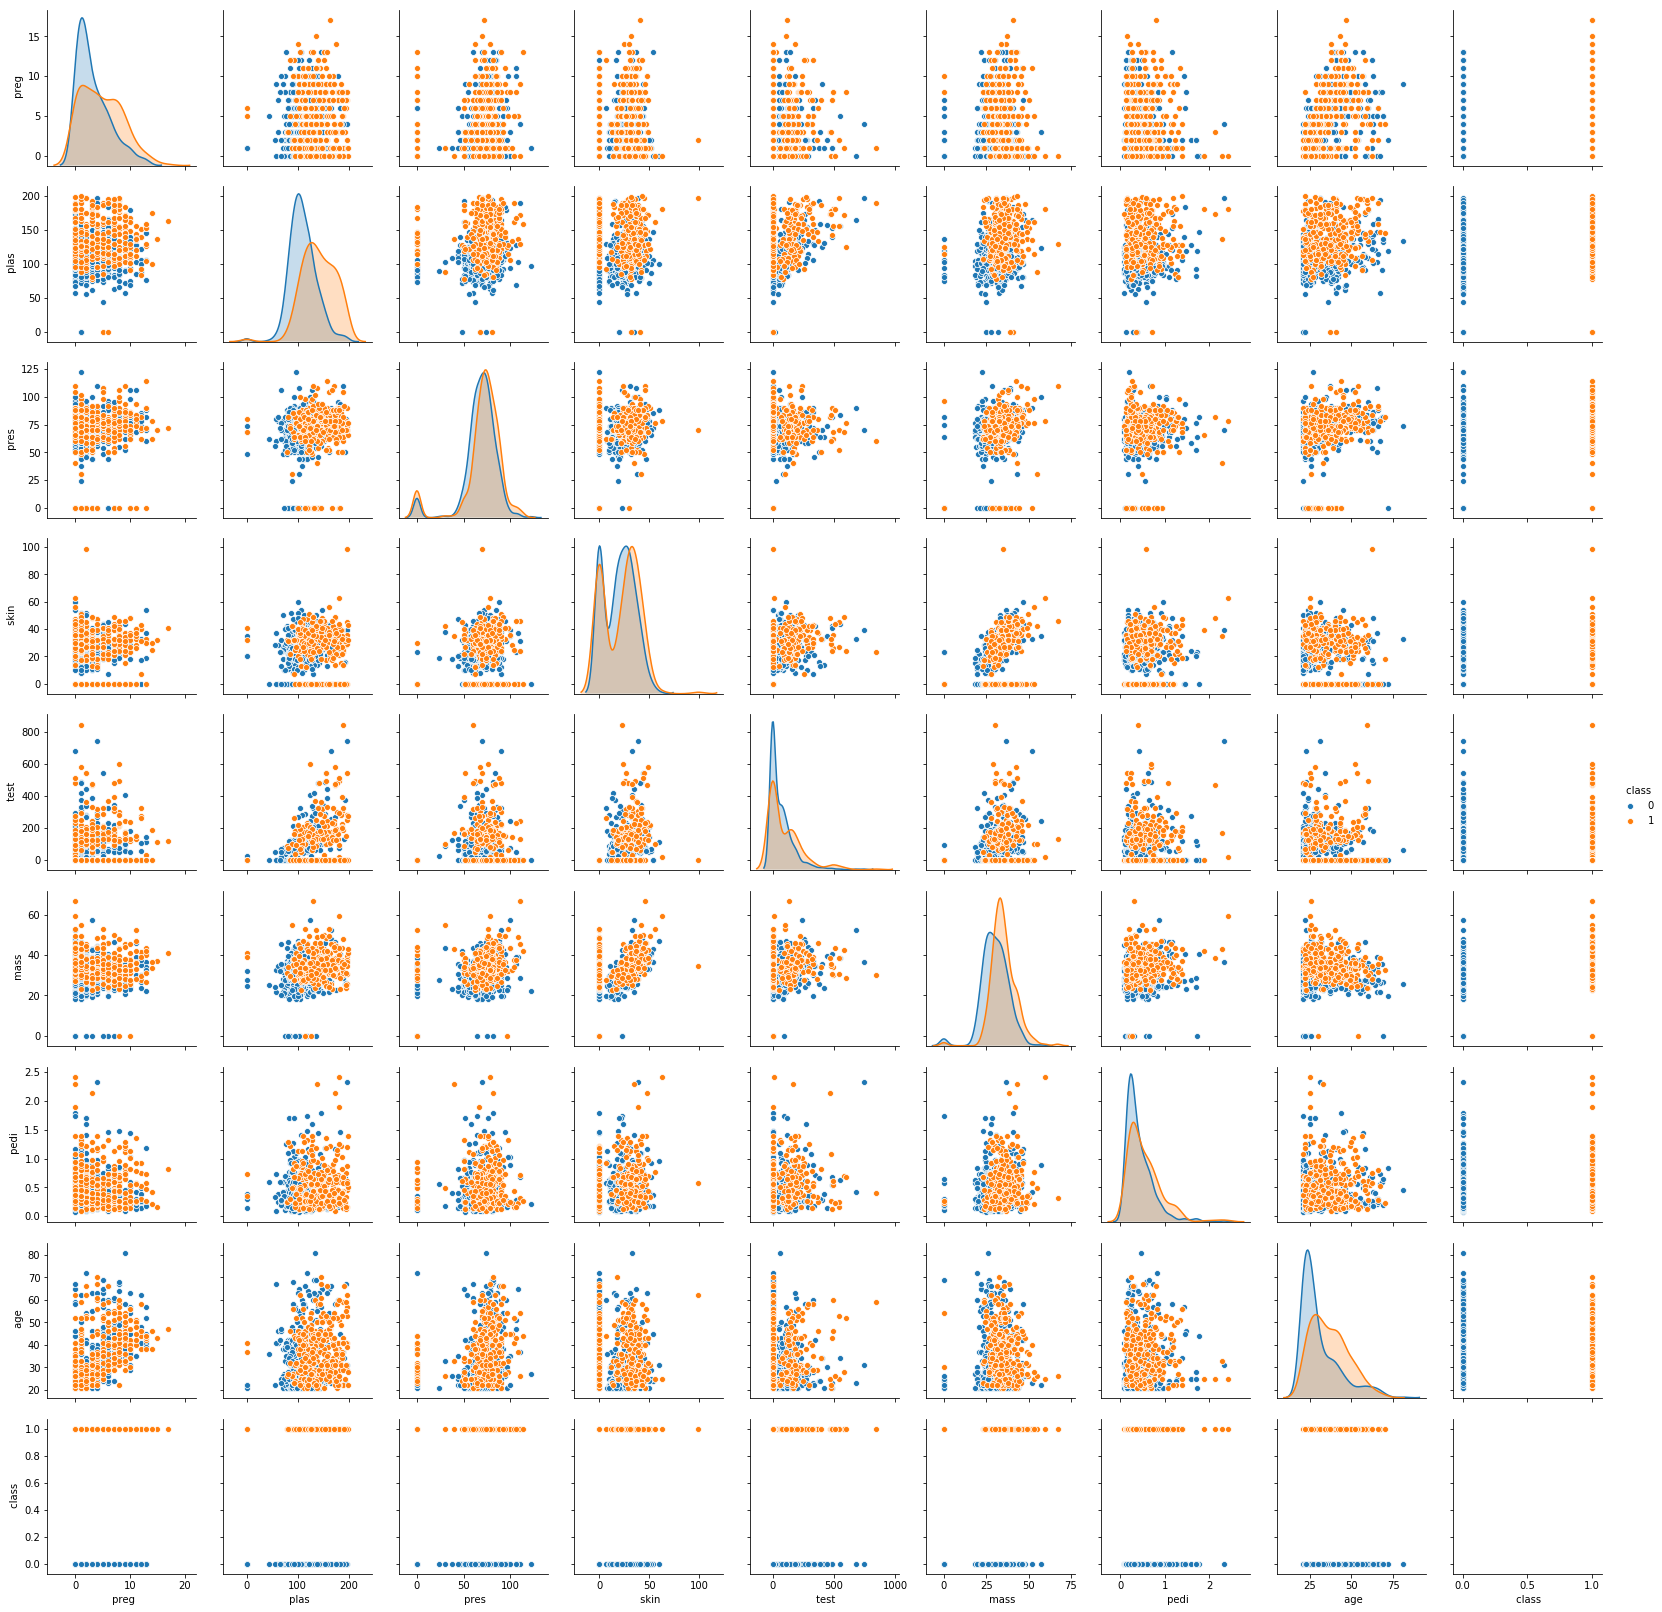

In [13]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.pairplot(data, hue = ' class')
plt.show()

## Standardize Data

In [14]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
array = data.values # separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X) # summarize transformed data
set_printoptions(precision=3) 
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## Recursive Feature Elimination

In [15]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(rescaledX, Y)
print("Num Features: %d" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True  True False False False  True False False]
Feature Ranking: [1 1 3 6 5 1 2 4]


RFE chose the top 3 features as preg, plas and pedi. These are marked True in the support array and marked with a choice 1 in the ranking array

## Train-Test-Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size = 0.33, random_state = 7)
model = LogisticRegression() 
model.fit(X_train, Y_train) 
result = model.score(X_test, Y_test) 
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 77.953%


### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[140  22]
 [ 34  58]]


Test Data Accuracy: 0.77953


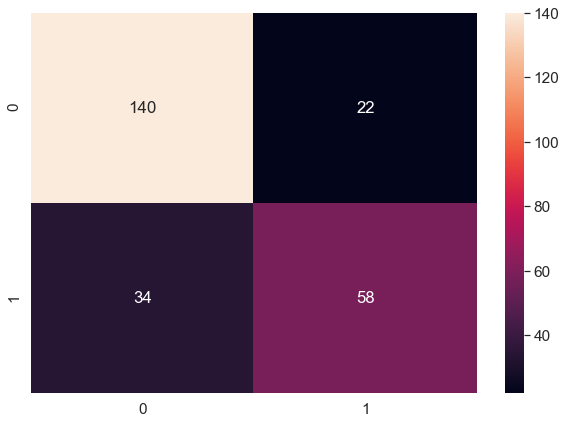

In [25]:
df_cm = pd.DataFrame(matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.5f" % accuracy_score(Y_test, predicted))

### Classification Report

In [17]:
from sklearn.metrics import classification_report
predicted = model.predict(X_test) 
report = classification_report(Y_test, predicted) 
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       162
         1.0       0.72      0.63      0.67        92

   micro avg       0.78      0.78      0.78       254
   macro avg       0.76      0.75      0.75       254
weighted avg       0.78      0.78      0.78       254



## K-fold Cross Validation

In [28]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits = 10, random_state = 7) 
model1 = LogisticRegression()
results = cross_val_score(model1, rescaledX, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.996% (5.009%)


In [29]:
scoring = 'roc_auc' 
results = cross_val_score(model1, rescaledX, Y, cv=kfold, scoring=scoring) 
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.828 (0.043)
